In [4]:
import matplotlib.pyplot as plt
import torch
from data_loader import test_dataset
from models.ResNet import get_resnet18_model

# Load model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = get_resnet18_model(num_classes=4)
model.load_state_dict(torch.load("saved_models/resnet_messidor.pth", map_location=device))
model.to(device)
model.eval()

# Pick one sample
img_tensor, label = test_dataset[90]
img_tensor = img_tensor.unsqueeze(0).to(device)  # Add batch dimension

# Inference
with torch.no_grad():
    output = model(img_tensor)
    predicted_class = torch.argmax(output, dim=1).item()
    probs = torch.softmax(output, dim=1)

print(f"True Label: {label.item()}, Predicted Label: {predicted_class}")
print(f"Probabilities: {probs.cpu().numpy()}")

True Label: 0, Predicted Label: 0
Probabilities: [[0.63730854 0.2673266  0.09246568 0.00289919]]


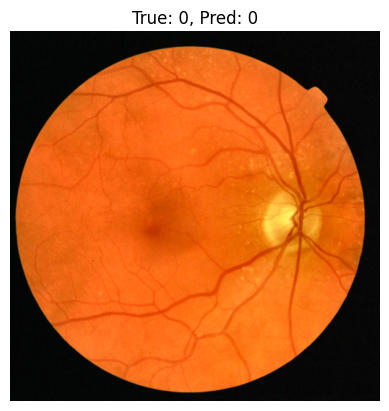

In [5]:
# Unnormalize for visualization
def unnormalize(tensor):
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    return tensor * std + mean

img_np = unnormalize(img_tensor[0].cpu()).permute(1, 2, 0).numpy()
plt.imshow(img_np)
plt.title(f"True: {label.item()}, Pred: {predicted_class}")
plt.axis('off')
plt.show()
